In [3]:
from feature_create_select.auto_select_feature import AutoSelect

In [4]:
import pandas as pd
df_train = pd.read_csv(r'E:/spark_use/pspark_use/train_data.csv')
# 当多类别时，目前需要修改 feature_selector 中的代码参考github中的最新提交
df_train = df_train[df_train['fhh_ispermission'].isin((0,1))]

In [5]:
# fhh_ispermission 作为标签，其他列作为特征
label = df_train['fhh_ispermission']
train = df_train[[item for item in df_train.columns if item !='fhh_ispermission']]

In [6]:
train = train.applymap(abs)

In [7]:
autos = AutoSelect(train,labels = label)

In [10]:
selection_params = {'missing_threshold':0.4, 'correlation_threshold':0.9, 'eval_metric':'auc', 'task':'classification', 'cumulative_importance':0.94,'sk_low_importance':0.95,'sk_select_model':{}}

In [11]:
autos.identify_all(selection_params)

0 features with greater than 0.40 missing values.

0 features with a single unique value.

5 features with a correlation magnitude greater than 0.90.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.627582
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.627582
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.627582
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.627582
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.627582
Training until validation scores don't improve for

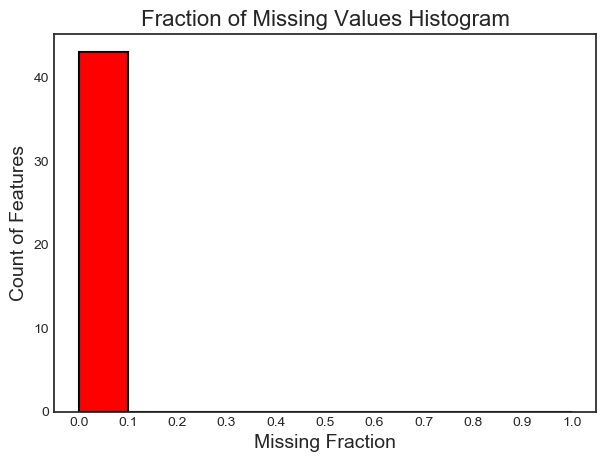

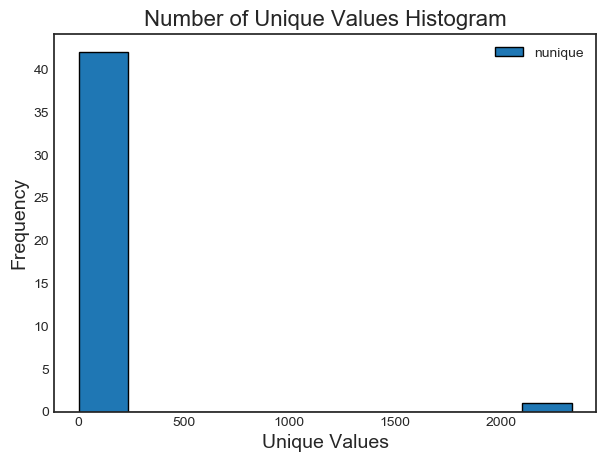

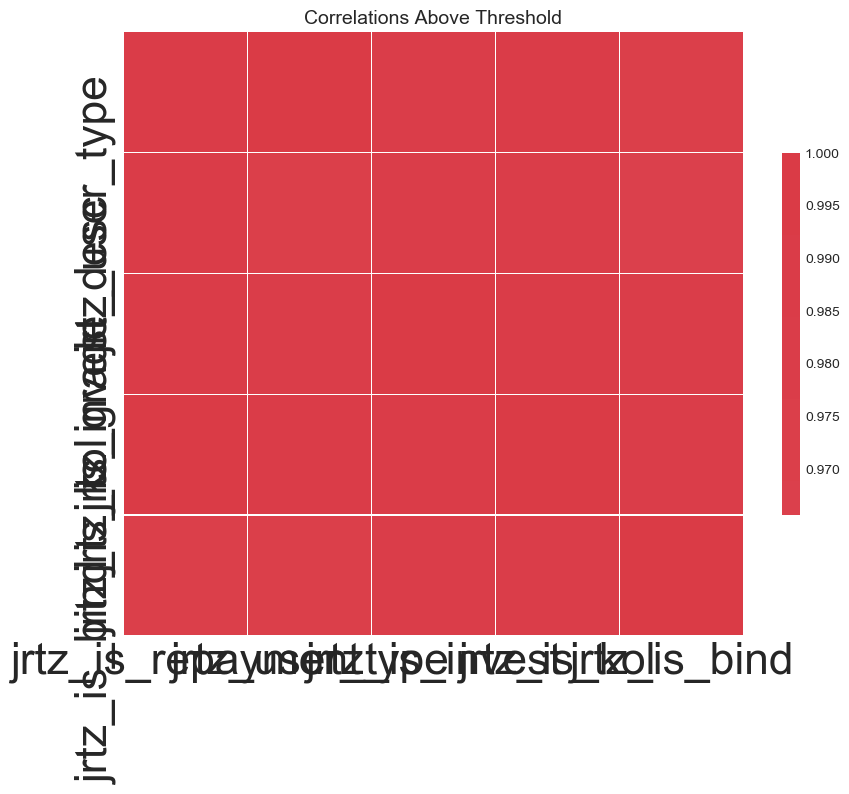

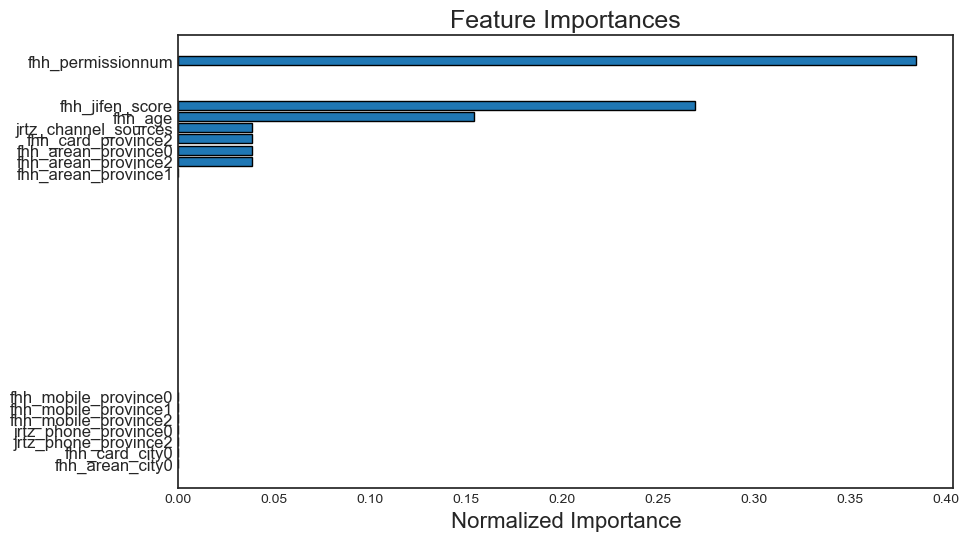

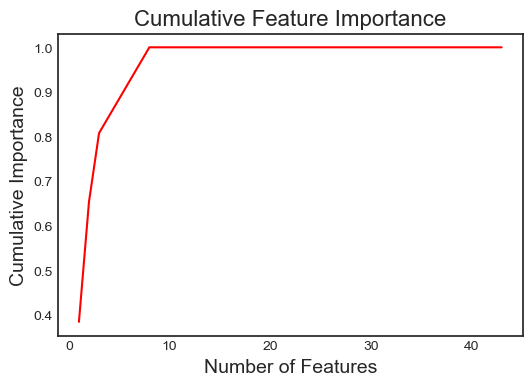

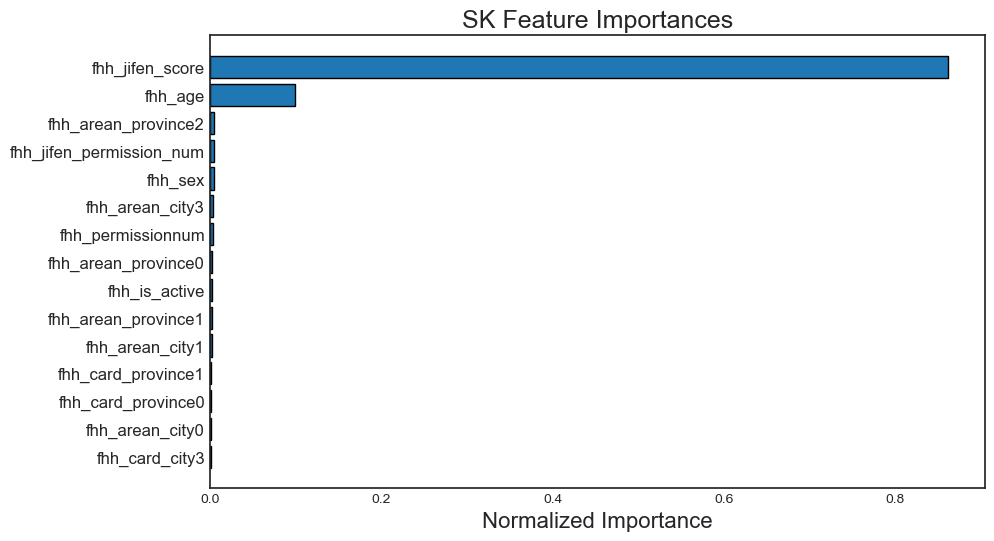

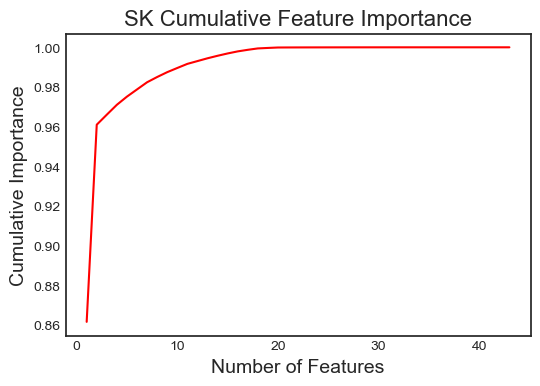

In [12]:
autos.plot_all()

In [14]:
data = autos.remove('all',keep_cols='jrtz_')

TypeError: remove() got an unexpected keyword argument 'keep_cols'